### O acesso ao banco de dados foi utilizado com o arquivo .Tar

### 1.Pergunta (Qual foi os top 2 filmes mais alugados de todos os tempos?)

* **Conclusão**
* A pergunta se refere a visualização dos filmes mais alugados, por tanto seleciono a tabela (film) para visualizar os titulos (film.title) sendo que estando relacionado a tabela de aluguel (rental) que por sua vez na query é relacionada ao inventario table (inventory) que tras o id do filme (film_id), e assim durante a contagem desse historico so pode existir filmes alugados que estao no inventario da locadora. Sendo um metodo encadeado mais seguro ao meu ponto de vista

In [ ]:
SELECT film.title, count(rental.vendas_id) as quantidade
FROM ( SELECT rental.inventory_id as vendas_id, inventory.film_id FROM public.rental JOIN inventory ON inventory.inventory_id = rental.inventory_id)
rental JOIN public.film ON film.film_id = rental.film_id
group by film.title
order by quantidade DESC
LIMIT 2;


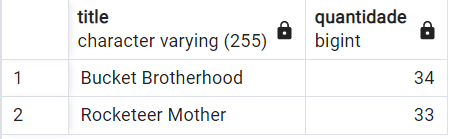

### 2.Pergunta (Dentre os top 16 filmes mais alugados, qual o nome completo do ator mais presente nesses filmes?)

* **Conclusão**
* A pergunta se refere a visualização dos filmes mais alugados, por tanto utilizo a query que já estava pronta seguindo o encadeamento das relações e com ela faço a crianção de uma VIEW. Assim facilitando o filtro do TOP16 filmes, assim posso criar um relacionamento da view com a tabela de Atores para fazer a contagem do Ator mais presente entre os TOP16.


In [ ]:
CREATE VIEW TOP16 AS
SELECT film.title, count(rental.vendas_id) as quantidade, rental.film_id
FROM ( SELECT rental.inventory_id as vendas_id, inventory.film_id FROM public.rental JOIN inventory ON inventory.inventory_id = rental.inventory_id)
rental JOIN public.film ON film.film_id = rental.film_id
group by film.title, rental.film_id
order by quantidade DESC
LIMIT 16;

SELECT CONCAT(film_actor.first_name, ' ',film_actor.last_name) as nome_completo, count(*) as quantidade
FROM ( SELECT actor.first_name, actor.last_name, film_actor.actor_id, film_actor.film_id FROM public.film_actor JOIN actor on actor.actor_id = film_actor.actor_id )
film_actor JOIN TOP16 ON TOP16.film_id = film_actor.film_id
group by nome_completo
order by quantidade DESC
LIMIT 1;

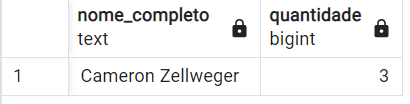

### 3.Pergunta (Quantos clientes novos a empresa adquiriu por mês?)

* **Conclusão**
* Nessa pergunta é necessario atenção no ponto que, consideramos a data do primeiro filme alugado sendo a data de inicio de um novo cliente. Assim é necessario filtrar as primeiras linhas aparentes de cada cliente, em um tabela que repete o fluxo de alguem que cada um faz durante o ano...
Após ter filtrado os primeiros registros de cada cliente, fiz a contagem de cada mes existente na query.

* **observações**
* A saida esperada dessa resposta seria: 2 colunas ( mês_entrada_cliente:date | quantidade_de_clientes:int ) e 3 linhas.
No entanto as resposta que encontrei foi de 5 linhas e o mes não esta no tipo date como foi esperado.


In [ ]:
SELECT mes_entrada_cliente, count(*) AS quantidade_de_clientes FROM
(SELECT DISTINCT ON (customer_id) customer_id, TO_CHAR(rental_date, 'Month') AS  mes_entrada_cliente
FROM public.rental) AS rental
group by mes_entrada_cliente

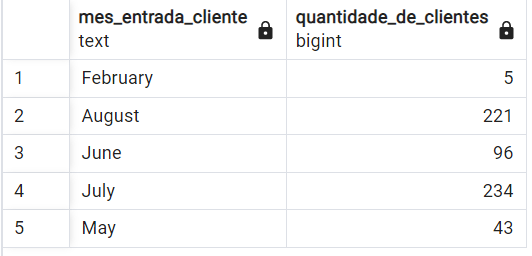